i: 0, Train Loss: 319.976288, Test Loss: 335.581329
i: 200, Train Loss: 32.210461, Test Loss: 31.124729
i: 400, Train Loss: 30.203932, Test Loss: 30.071045
i: 600, Train Loss: 28.619015, Test Loss: 29.693377
i: 800, Train Loss: 27.367125, Test Loss: 29.797880
i: 1000, Train Loss: 26.378283, Test Loss: 30.238413
i: 1200, Train Loss: 25.597216, Test Loss: 30.904570
i: 1400, Train Loss: 24.980270, Test Loss: 31.713528
i: 1600, Train Loss: 24.492954, Test Loss: 32.603825
i: 1800, Train Loss: 24.108034, Test Loss: 33.530422
i: 2000, Train Loss: 23.804001, Test Loss: 34.460850
i: 0, Train Loss: 319.877350, Test Loss: 335.534210
i: 200, Train Loss: 37.836853, Test Loss: 37.096558
i: 400, Train Loss: 29.819895, Test Loss: 28.319719
i: 600, Train Loss: 25.349482, Test Loss: 23.657461
i: 800, Train Loss: 22.856689, Test Loss: 21.229870
i: 1000, Train Loss: 21.466663, Test Loss: 20.004780
i: 1200, Train Loss: 20.691553, Test Loss: 19.417646
i: 1400, Train Loss: 20.259333, Test Loss: 19.161951
i: 

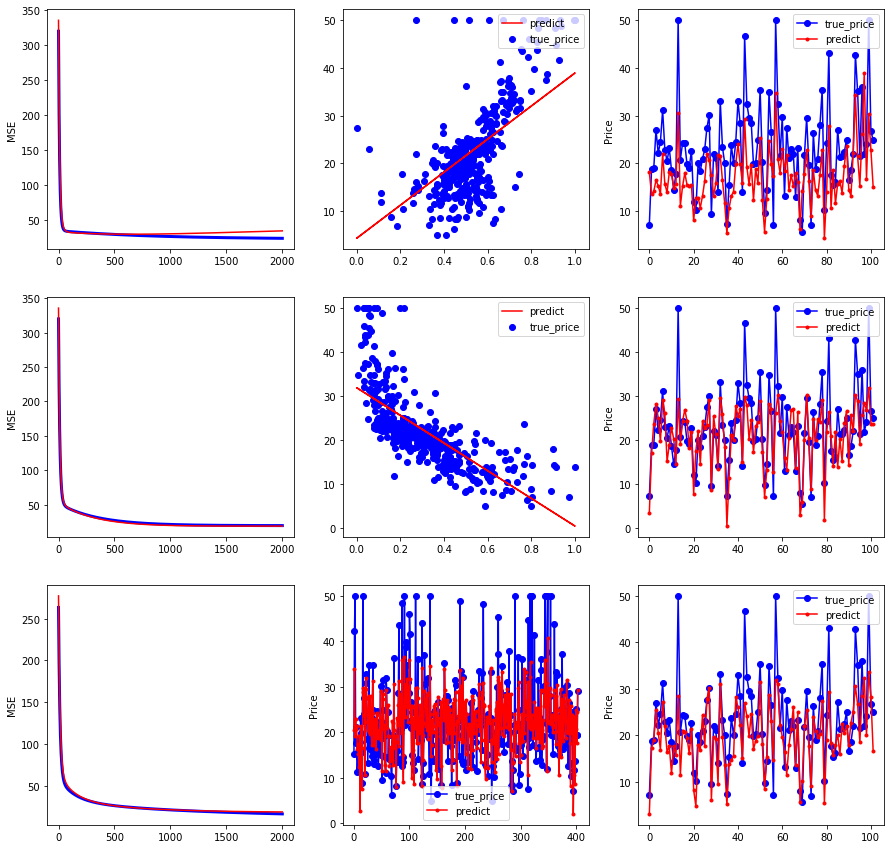

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

boston_housing  = tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y) = boston_housing.load_data()

x_train1 = train_x[:,5]
x_train1=(x_train1-x_train1.min())/(x_train1.max()-x_train1.min())
y_train1 = train_y

x_test1 = test_x[:,5]
x_test1=(x_test1-x_test1.min())/(x_test1.max()-x_test1.min())
y_test1 = test_y

learn_rate1 = 0.04
iter1 = 2000
display_step1 = 200

np.random.seed(612)
w1 = tf.Variable(np.random.randn())
b1 = tf.Variable(np.random.randn())

mse_train1 = []
mse_test1 = []

for i in range(0,iter1+1):
    with tf.GradientTape() as tape1:
        
        pred_train1 = w1*x_train1+b1
        loss_train1 = 0.5*tf.reduce_mean(tf.square(y_train1-pred_train1))
        
        pred_test1 = w1*x_test1+b1
        loss_test1 = 0.5*tf.reduce_mean(tf.square(y_test1-pred_test1))
        
    mse_train1.append(loss_train1)
    mse_test1.append(loss_test1)
    
    dL_dw1,dL_db1 = tape1.gradient(loss_train1,[w1,b1])
    w1.assign_sub(learn_rate1*dL_dw1)
    b1.assign_sub(learn_rate1*dL_db1)
    
    if i%display_step1==0:
        print("i: %i, Train Loss: %f, Test Loss: %f" %(i,loss_train1,loss_test1))

plt.figure(figsize=(15,15))

plt.subplot(331)
plt.ylabel("MSE")
plt.plot(mse_train1,color="blue",linewidth=3)
plt.plot(mse_test1,color="red",linewidth=1.5)

plt.subplot(332)
plt.scatter(x_train1,y_train1,color='blue',label='true_price')
plt.plot(x_train1,pred_train1,color='red',label="predict")
plt.legend(loc='upper right')

plt.subplot(333)
plt.plot(y_test1,color="blue",marker="o",label="true_price")
plt.plot(pred_test1,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")

boston_housing  = tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y) = boston_housing.load_data()

x_train = train_x[:,12]
x_train=(x_train-x_train.min())/(x_train.max()-x_train.min())
y_train = train_y

x_test = test_x[:,12]
x_test=(x_test-x_test.min())/(x_test.max()-x_test.min())
y_test = test_y

learn_rate = 0.04
iter = 2000
display_step = 200

np.random.seed(612)
w = tf.Variable(np.random.randn())
b = tf.Variable(np.random.randn())

mse_train = []
mse_test = []

for i in range(0,iter+1):
    with tf.GradientTape() as tape:
        
        pred_train = w*x_train+b
        loss_train = 0.5*tf.reduce_mean(tf.square(y_train-pred_train))
        
        pred_test = w*x_test+b
        loss_test = 0.5*tf.reduce_mean(tf.square(y_test-pred_test))
        
    mse_train.append(loss_train)
    mse_test.append(loss_test)
    
    dL_dw,dL_db = tape.gradient(loss_train,[w,b])
    w.assign_sub(learn_rate*dL_dw)
    b.assign_sub(learn_rate*dL_db)
    
    if i%display_step==0:
        print("i: %i, Train Loss: %f, Test Loss: %f" %(i,loss_train,loss_test))

#plt.figure(figsize=(15,10))

plt.subplot(334)
plt.ylabel("MSE")
plt.plot(mse_train,color="blue",linewidth=3)
plt.plot(mse_test,color="red",linewidth=1.5)

plt.subplot(335)
plt.scatter(x_train,y_train,color='blue',label='true_price')
plt.plot(x_train,pred_train,color='red',label="predict")
plt.legend(loc='upper right')

plt.subplot(336)
plt.plot(y_test,color="blue",marker="o",label="true_price")
plt.plot(pred_test,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")

boston_housing = tf.keras.datasets.boston_housing
(train_x,train_y),(test_x,test_y) = boston_housing.load_data()

num_train2 = len(train_x)
num_test2 = len(test_x)

x_train2 = (train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
y_train2 = train_y

x_test2 = (test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
y_test2 = test_y

x0_train2 = np.ones(num_train2).reshape(-1,1)
x0_test2 = np.ones(num_test2).reshape(-1,1)

X_train2 = tf.cast(tf.concat([x0_train2,x_train2],axis=1),tf.float32)
X_test2 = tf.cast(tf.concat([x0_test2,x_test2],axis=1),tf.float32)

Y_train2 = tf.constant(y_train2.reshape(-1,1),tf.float32)
Y_test2 = tf.constant(y_test2.reshape(-1,1),tf.float32)

learn_rate2 = 0.01
iter2 = 2000
display_step2 = 200

np.random.seed(612)
W2 = tf.Variable(np.random.randn(14,1),dtype = tf.float32)

mse_train2=[]
mse_test2=[]

for i in range(0,iter2+1):
    
    with tf.GradientTape() as tape2:
        
        PRED_train2 = tf.matmul(X_train2,W2)
        Loss_train2 = 0.5*tf.reduce_mean(tf.square(Y_train2-PRED_train2))
        
        PRED_test2 = tf.matmul(X_test2,W2)
        Loss_test2 = 0.5*tf.reduce_mean(tf.square(Y_test2-PRED_test2))
        
    mse_train2.append(Loss_train2)
    mse_test2.append(Loss_test2)
    
    dL_dW2 = tape2.gradient(Loss_train2,W2)
    W2.assign_sub(learn_rate2*dL_dW2)
    
    if i % display_step2==0:
        print("i:%i, Train Loss:%f, Test Loss:%f " % (i,Loss_train2,Loss_test2))

#plt.figure(figsize=(20,4))

plt.subplot(337)
plt.ylabel("MSE")
plt.plot(mse_train2,color="blue",linewidth=3)
plt.plot(mse_test2,color="red",linewidth=1.5)

plt.subplot(338)
plt.plot(y_train2,color="blue",marker="o",label="true_price")
plt.plot(PRED_train2,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")

plt.subplot(339)
plt.plot(y_test2,color="blue",marker="o",label="true_price")
plt.plot(PRED_test2,color="red",marker=".",label="predict")
plt.legend()
plt.ylabel("Price")
plt.show()
